# Lab 5-2: Autocorrelation 
---

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy.io as sio # scipy input/output functions for reading a .mat file
import datetime as dt # for formatting dates and times
import matplotlib.pyplot as plt
%matplotlib inline


Load some example data of air temperature measured with *iButton* temperature sensors.

Unpack the mat file into numpy arrays, format dates to python datetimes following the method outlined [here](https://sociograph.blogspot.com/2011/04/how-to-avoid-gotcha-when-converting.html).

In [2]:
# load the ibutton data
data = sio.loadmat('../data/iButtons_2008-2010.mat')

# convert matlab format dates to python datetimes
datenums = data['TIME'][:,0]
dates = [dt.datetime.fromordinal(int(d)) + dt.timedelta(days=d%1) - dt.timedelta(days = 366) for d in datenums]
pd.plotting.register_matplotlib_converters()

# Unpack the rest of the data
SITE_NAMES = [name[0][0] for name in data['SITE_NAMES']]
SITE_LATS = data['SITE_LATS'][:,0]
SITE_LONS = data['SITE_LONS'][:,0]
SITE_ELEVS = data['SITE_ELEVS'][:,0]
AIR_TEMPERATURE = data['AIR_TEMPERATURE']
AIR_TEMPERATURE_ZEROMEAN = data['AIR_TEMPERATURE_ZEROMEAN']
nt = data['nt'][0][0] # size in the t dimension
nx = data['nx'][0][0] # size in the x dimension (number of sites)

***
Plot a timseries for one of the sites in our dataset

In [3]:
site = 3

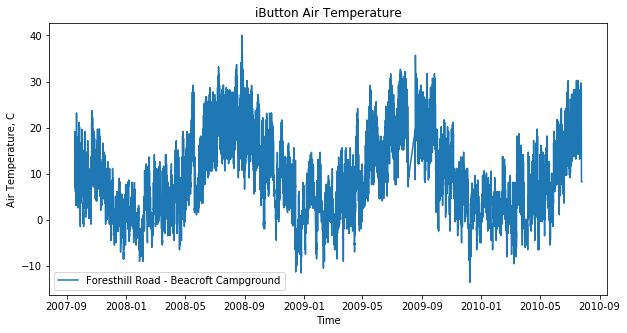

In [4]:
# create a figure and specify its size
plt.figure(figsize=(10,5))

plt.plot(dates,AIR_TEMPERATURE[:,site], label=SITE_NAMES[site])

plt.legend(loc='lower left')                   # add a legend to the lower left of the figure
plt.ylabel('Air Temperature, C')               # set the label for the y axis
plt.xlabel('Time')                             # set the label for the x axis
plt.title('iButton Air Temperature');          # give our plot a title

It's hard to see what's going on in detail, so we'll set x and y axes limits to "zoom in" to just a few days

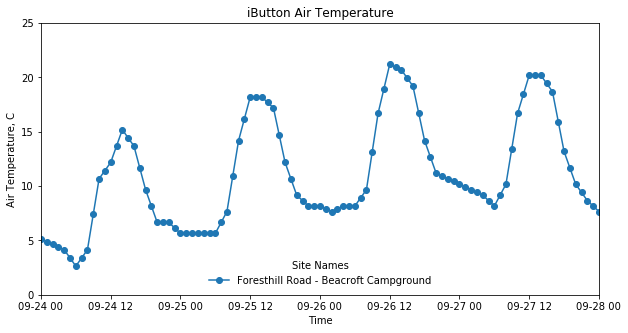

In [5]:
# create a figure and specify its size
plt.figure(figsize=(10,5))

plt.plot(dates,AIR_TEMPERATURE[:,site], '-o', label=SITE_NAMES[site])

plt.legend(frameon=False,
           loc='lower center',
           labelspacing=0.5,
           title='Site Names')                 # add a legend and format
plt.ylabel('Air Temperature, C')               # set the label for the y axis
plt.xlabel('Time')                             # set the label for the x axis
plt.title('iButton Air Temperature');          # give our plot a title

# use xlim to set x axis limits to zoom in between two specific dates
plt.xlim(('2007-09-24', '2007-09-28')); 

# use ylim to set y axis limits to zoom in between two specific temperatures
plt.ylim((0,25)); 

**Compute the autocorrelation of this dataset for different lag values**

There are a few functions we could use like [pandas.Series.autocorr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.autocorr.html) if we have our data in a pandas dataframe, but here I'm going to use [`np.corrcoef()`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html):

In [6]:
# start with a lag of 1 hour, but then change this and run the cell a few times to try out different values
lag = 1

# our dataset of air temperatures for this site will go from the beginning all the way to n-k, 
# or using python's negative indexing notation we can say it goes all the way to index -lag
x = AIR_TEMPERATURE[:-lag,site]

# create a "lagged" dataset by removin the first k numbers
y = AIR_TEMPERATURE[lag:,site]

# calculate the autocorrelation
R = np.corrcoef(x,y)
print('Autocorrelation at lag={} is R='.format(lag))
print(R)

Autocorrelation at lag=1 is R=
[[1.         0.98782022]
 [0.98782022 1.        ]]


This gives us a matrix of correlation values for the variables we input. Notice here that its symmetrical, so we can pick one to report our autocorrelation value.

In [7]:
print('Autocorrelation at lag={} is R={}'.format(lag, R[0][1]))

Autocorrelation at lag=1 is R=0.987820215494748


---
Now loop through all lag value from k=1 to k=n/4 (it's advised not to use lags > n/4), and save all the autocorrelation values to an array.

In [8]:
# make an array of our lag values that we want
lags = np.arange(1,int(len(AIR_TEMPERATURE[:,site])/4))

In [9]:
# create an empty array to store autocorrelation values in
R = np.empty(len(lags))

In [10]:
# loop through all the lags and compute autocorrelation
for i, k in enumerate(lags):
    # our dataset of air temperatures for this site will go from the beginning all the way to n-k, 
    # or using python's negative indexing notation we can say it goes all the way to index -lag
    x = AIR_TEMPERATURE[:-k,site]
    # create a "lagged" dataset by removin the first k numbers
    y = AIR_TEMPERATURE[k:,site]
    # calculate the autocorrelation
    R[i] = np.corrcoef(x,y)[0][1]

Plot autocorrelation versus lag

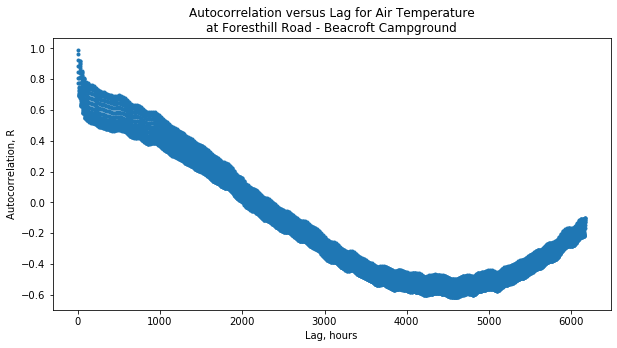

In [11]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(lags, R,'.')

ax.set_ylabel('Autocorrelation, R')
ax.set_xlabel('Lag, hours')
ax.set_title('Autocorrelation versus Lag for Air Temperature\nat {}'.format(SITE_NAMES[site]));

Adjust the axes limits to zoom in to the first couple hunderd lag values to see what's going on here.

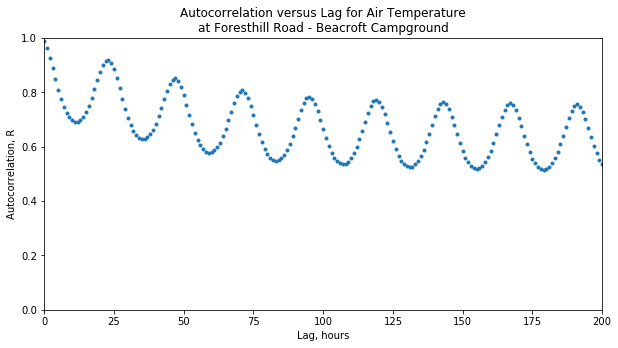

In [12]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(R,'.')

ax.set_xlim((0,200))
ax.set_ylim((0,1))

ax.set_ylabel('Autocorrelation, R')
ax.set_xlabel('Lag, hours')
ax.set_title('Autocorrelation versus Lag for Air Temperature\nat {}'.format(SITE_NAMES[site]));

Notice the wavy pattern, it's peaking about every 24 hours meaning that while we have our highest autocorrelation just a lag of 1 or 2 hours, we also get high autocorrelations around 24 hours, or 48 hours, or 72 hours, and every multiple of 24.